importing libraries

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pickle

preprocessing

In [2]:
df = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [4]:
df.shape

(10420, 6)

In [5]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
le = LabelEncoder()
le.fit(df['Open'])
le.fit(df['High'])
le.fit(df['Low'])
le.fit(df['Close'])
le.fit(df['Adj Close'])

LabelEncoder()

In [10]:
X = df.iloc[:,:-1]
y = df['Volume']

In [11]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

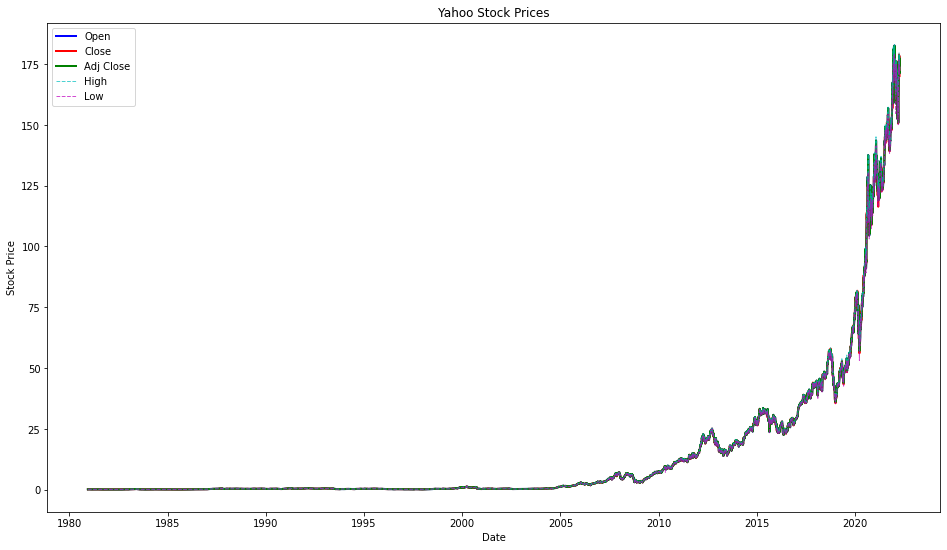

In [12]:
plt.figure(figsize=(16,9))

plt.plot(df.index, df.Open, lw=2, color='b',label='Open')
plt.plot(df.index, df.Close, lw=2, color='r',label='Close')
plt.plot(df.index, df.Open, lw=2, color='g',label='Adj Close')
plt.plot(df.index, df.High, lw=1, color='c',linestyle='--',alpha=0.7,label='High')
plt.plot(df.index, df.Low, lw=1, color='m',linestyle='--',alpha=0.7,label='Low')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices')
plt.show()

test & train data

In [13]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=1234)

Random Forest Regressor

In [14]:
reg = RandomForestRegressor()
reg.fit(xtrain, ytrain)
pred = reg.predict(xtest)
reg.score(xtest,ytest)*100

57.965710714542716

Linear Regressor

In [15]:
lg = LinearRegression()
lg.fit(xtrain, ytrain)
pred = lg.predict(xtest)
lg.score(xtest,ytest)*100

6.79762689002944

Decision Tree Regreesor

In [16]:
dtr = DecisionTreeRegressor(max_depth=60)
dtr.fit(xtrain, ytrain)
pred = dtr.predict(xtest)
dtr.score(xtest,ytest)*100

31.875937648608556

In [17]:
file = open("model_v1.pkl", 'wb')
pickle.dump(reg, file)